# <ins> Risk Mitigation Analysis<ins>
##  Establish recommendations for purchasing airplanes for commercial and private enterprises
### Data gathered by National Transportation Safety Board. Includes aviation accident history from 1962 to 2023 about civil aviation accidents in the United States
### Database "[Aviation Accident Database & Synopses, up to 2023](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses)" taken from kaggle.com
    
    

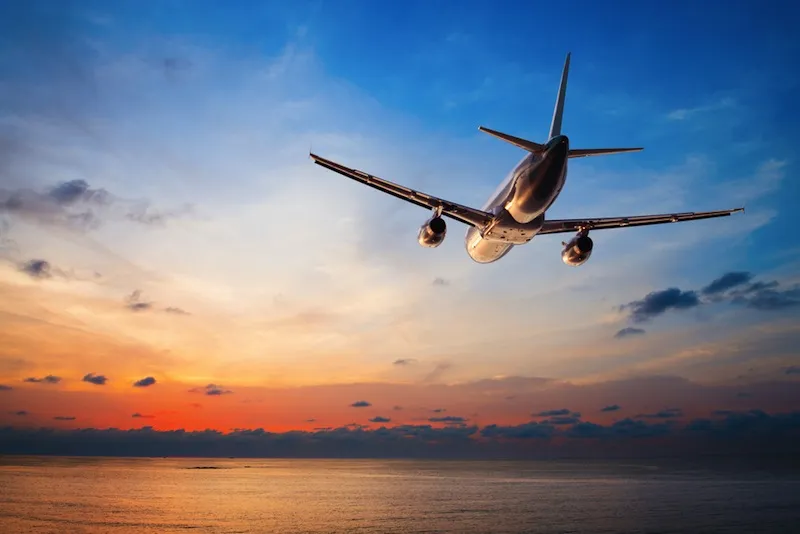

## General Data Exploration
* Imported necessary libraries and loaded the dataset. 
* Explored the structure of the dataset including the columns and their data types. 
* Identified columns relevant for analysis including: Event.Date, Number.of.Engines, Weather.Condition, Broad.phase.of.flight, and various injury-related columns

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# df = pd.read_csv('AviationData.csv', encoding='utf-8')
import csv

encodings = ['utf-8', 'latin-1', 'utf-16', 'windows-1252']

for encoding in encodings:
    try:
        df = pd.read_csv('AviationData.csv', encoding=encoding)
        break
    except UnicodeDecodeError:
        continue


C:\Users\jared\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [5]:
df.shape

(88889, 31)

In [6]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
df.value_counts('Investigation.Type')

Investigation.Type
Accident    85015
Incident     3874
dtype: int64

In [8]:
df.value_counts('Purpose.of.flight')

Purpose.of.flight
Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
dtype: int64

In [9]:
df.value_counts('Aircraft.damage')

Aircraft.damage
Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
dtype: int64

In [10]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### Analysis by Number of Engines
* grouped the data by the number of engines and examined the distribution of injuries
* Calculated the percentage of each type of injury relative to the total number of passengers involved for each configuration of Engines
* Visualized the comparison of injury percentage to engine number for all injuries and fatal injuries in isolation

In [11]:
Enginesdf = df.groupby('Number.of.Engines').sum()
Enginesdf

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Number.of.Engines,,,,
0.0,409.0,450.0,486.0,3118.0
1.0,22131.0,13915.0,17776.0,73166.0
2.0,10521.0,3420.0,4531.0,195780.0
3.0,878.0,333.0,1174.0,51396.0
4.0,1666.0,231.0,509.0,40927.0
6.0,0.0,0.0,0.0,0.0
8.0,0.0,21.0,3.0,11.0


In [12]:
#Comparing percentage of injuries to total passengers by number of engines. 
#First establishing total passengers involved by adding a new column
Enginesdf['Total.Passengers'] = Enginesdf['Total.Fatal.Injuries'] + Enginesdf['Total.Serious.Injuries'] + Enginesdf['Total.Minor.Injuries'] + Enginesdf['Total.Uninjured']
#dropped airplanes with 0,6 and 8 engines as they are statistically irrelevant for this analysis.  

Enginesdf = Enginesdf.drop(8)
Enginesdf = Enginesdf.drop(0)
Enginesdf = Enginesdf.drop(6)
Enginesdf

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Passengers
Number.of.Engines,,,,,
1.0,22131.0,13915.0,17776.0,73166.0,126988.0
2.0,10521.0,3420.0,4531.0,195780.0,214252.0
3.0,878.0,333.0,1174.0,51396.0,53781.0
4.0,1666.0,231.0,509.0,40927.0,43333.0


In [13]:
#Created new columns with the percentage for each engine with the different categories of injuries. 
Enginesdf['Percent.Fatal.Injuries'] = Enginesdf['Total.Fatal.Injuries'] / Enginesdf['Total.Passengers']
Enginesdf['Percent.Serious.Injuries'] = Enginesdf['Total.Serious.Injuries']/Enginesdf['Total.Passengers']
Enginesdf['Percent.Minor.Injuries'] = Enginesdf['Total.Minor.Injuries']/Enginesdf['Total.Passengers']
Enginesdf['Percent.Uninjured'] = Enginesdf['Total.Uninjured']/Enginesdf['Total.Passengers']
Enginesdf

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Passengers,Percent.Fatal.Injuries,Percent.Serious.Injuries,Percent.Minor.Injuries,Percent.Uninjured
Number.of.Engines,,,,,,,,,
1.0,22131.0,13915.0,17776.0,73166.0,126988.0,0.174276,0.109577,0.139982,0.576165
2.0,10521.0,3420.0,4531.0,195780.0,214252.0,0.049106,0.015963,0.021148,0.913784
3.0,878.0,333.0,1174.0,51396.0,53781.0,0.016325,0.006192,0.021829,0.955653
4.0,1666.0,231.0,509.0,40927.0,43333.0,0.038446,0.005331,0.011746,0.944476


In [14]:
Enginesdf['Percent.Uninjured']

Number.of.Engines
1.0    0.576165
2.0    0.913784
3.0    0.955653
4.0    0.944476
Name: Percent.Uninjured, dtype: float64

In [15]:
#created further subset dataframe to analyze percentage of difference injuries by number of engines. 
subset_df = Enginesdf[['Percent.Fatal.Injuries', 'Percent.Serious.Injuries', 'Percent.Minor.Injuries', 'Percent.Uninjured']]

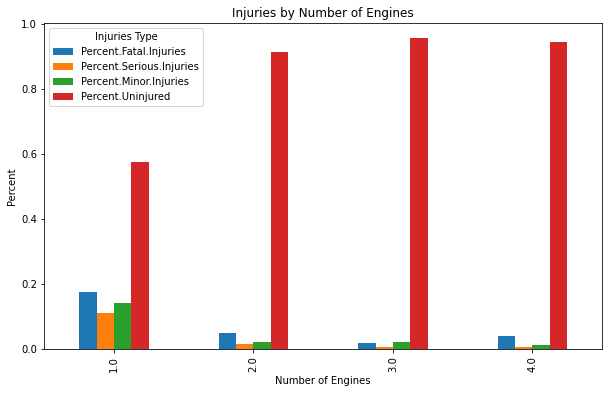

In [37]:
# Create a figure and axes object with a larger size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar graph on the axes
subset_df.plot(kind='bar', stacked=False, ax=ax)

# Set labels and titles
ax.set_xlabel('Number of Engines')
ax.set_ylabel('Percent')
ax.set_title('Injuries by Number of Engines')

# Add a legend
ax.legend(title='Injuries Type')

# Show the plot
plt.show()

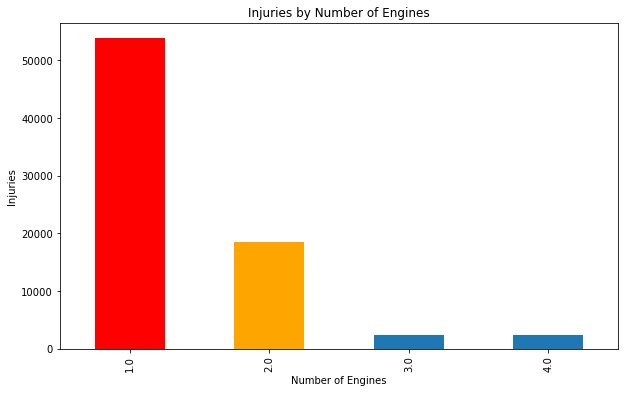

In [43]:
plt.figure(figsize=(10, 6))

#visualized how many total injuries there are by engine configuration
Enginesdf['Total.Injuries'] = Enginesdf['Total.Fatal.Injuries'] + Enginesdf['Total.Serious.Injuries'] + Enginesdf['Total.Minor.Injuries']
Engine_injuries_df = Enginesdf['Total.Injuries']

ax = Engine_injuries_df.plot(kind='bar')
#switched the color of column 1 to red for emphasis
ax.patches[0].set_facecolor('red')
ax.patches[1].set_facecolor('orange')
plt.xlabel('Number of Engines')
plt.ylabel('Injuries')
plt.title('Injuries by Number of Engines')

plt.show()

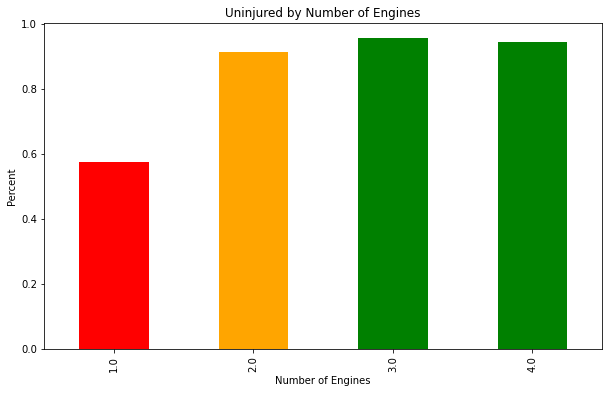

In [42]:
# visualized percentage of passengers uninjured in crashes by engine configuration
plt.figure(figsize=(10, 6))

fatal_subset_df = Enginesdf['Percent.Uninjured']
ax = fatal_subset_df.plot(kind='bar')
ax.patches[0].set_facecolor('red')
ax.patches[1].set_facecolor('orange')
ax.patches[2].set_facecolor('green')
ax.patches[3].set_facecolor('green')
plt.xlabel('Number of Engines')
plt.ylabel('Percent')
plt.title('Uninjured by Number of Engines')

plt.show()

# Phase of Flight Analysis
* Examined total fatal injuries across different phases of flight for each number of engines
* Plotted the total injuries across different phases of flight for each number of engines

In [19]:
phase_subset_df = df.groupby(['Broad.phase.of.flight','Number.of.Engines']).sum()
index = pd.MultiIndex.from_tuples(phase_subset_df.index, names=['Broad.phase.of.flight', 'Number.of.Engines'])
df_throwaway = pd.DataFrame(phase_subset_df.values, index=index, columns=['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured'])
df_filtered = df_throwaway.drop(index=df_throwaway[df_throwaway.index.get_level_values('Number.of.Engines') == 0.0].index)
#Filtered out planes with no Engines
df_filtered

Total.Fatal.Injuries  \
Broad.phase.of.flight Number.of.Engines                         
Approach              1.0                              1883.0   
                      2.0                              1458.0   
                      3.0                               141.0   
                      4.0                               314.0   
Climb                 1.0                               952.0   
                      2.0                               555.0   
                      3.0                                 0.0   
                      4.0                               241.0   
Cruise                1.0                              4426.0   
                      2.0                              1412.0   
                      3.0                               114.0   
                      4.0                                61.0   
Descent               1.0                               569.0   
                      2.0                               329.0   
                      3.0                                 0.0   
                      4.0                                 3.0   
Go-around             1.0                               359.0   
                      2.0                               216.0   
                      3.0                                 0.0   
                      4.0                                12.0   
Landing               1.0                               320.0   
                      2.0                               174.0   
                      3.0                                 3.0   
                      4.0                                 0.0   
Maneuvering           1.0                              4572.0   
                      2.0                               672.0   
                      3.0                                 1.0   
                      4.0                                12.0   
Other                 1.0                                53.0   
                      2.0                                23.0   
                      4.0                                 7.0   
Standing              1.0                                75.0   
                      2.0                                81.0   
                      3.0                                 1.0   
                      4.0                                 3.0   
Takeoff               1.0                              2457.0   
                      2.0                              1523.0   
                      3.0                               176.0   
                      4.0                               118.0   
Taxi                  1.0                                27.0   
                      2.0                                72.0   
                      3.0                                 2.0   
                      4.0                                 1.0   
Unknown               1.0                               610.0   
                      2.0                               131.0   
                      3.0                                 0.0   
                      4.0                                 0.0   

                                         Total.Serious.Injuries  \
Broad.phase.of.flight Number.of.Engines                           
Approach              1.0                                1280.0   
                      2.0                                 365.0   
                      3.0                                  20.0   
                      4.0                                 112.0   
Climb                 1.0                                 441.0   
                      2.0                                 119.0   
                      3.0                                  13.0   
                      4.0                                  12.0   
Cruise                1.0                                1589.0   
                      2.0                                 337.0   
                      3.0                          

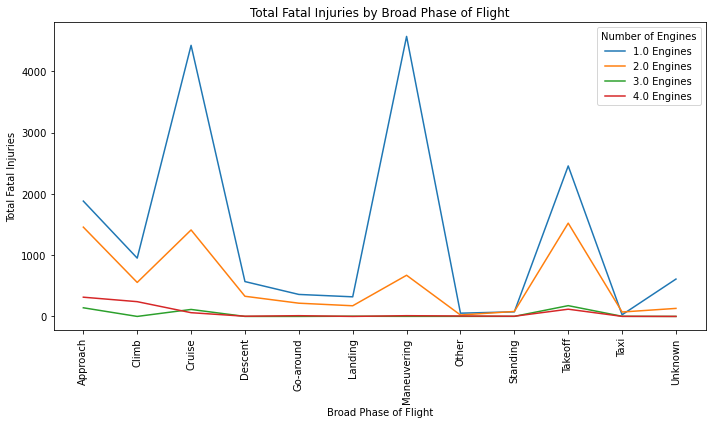

In [20]:
plt.figure(figsize=(10, 6))

engines = df_filtered.index.get_level_values('Number.of.Engines').unique()

# Plotted total fatal injuries by broad phase of flight for each engine amount
for engine in engines:
    df_engine = df_filtered.xs(engine, level='Number.of.Engines')
    plt.plot(df_engine.index.get_level_values('Broad.phase.of.flight'), df_engine['Total.Fatal.Injuries'], label=f'{engine} Engines')

# Customized the plot
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Total Fatal Injuries')
plt.title('Total Fatal Injuries by Broad Phase of Flight')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Number of Engines')

# Showed plot
plt.tight_layout()
plt.show()

In [21]:
df_filtered['Total.Injuries'] = df_filtered['Total.Fatal.Injuries'] + df_filtered['Total.Serious.Injuries'] + df_filtered['Total.Minor.Injuries']
df_injured = df_filtered
# Created new column inclusive of all injuries and displayed first 5 rows
df_injured.head()

Total.Fatal.Injuries  \
Broad.phase.of.flight Number.of.Engines                         
Approach              1.0                              1883.0   
                      2.0                              1458.0   
                      3.0                               141.0   
                      4.0                               314.0   
Climb                 1.0                               952.0   

                                         Total.Serious.Injuries  \
Broad.phase.of.flight Number.of.Engines                           
Approach              1.0                                1280.0   
                      2.0                                 365.0   
                      3.0                                  20.0   
                      4.0                                 112.0   
Climb                 1.0                                 441.0   

                                         Total.Minor.Injuries  \
Broad.phase.of.flight Number.of.Engines                         
Approach              1.0                              1825.0   
                      2.0                               541.0   
                      3.0                                52.0   
                      4.0                                 5.0   
Climb                 1.0                               585.0   

                                         Total.Uninjured  Total.Injuries  
Broad.phase.of.flight Number.of.Engines                                   
Approach              1.0                         4400.0          4988.0  
                      2.0                         9431.0          2364.0  
                      3.0                         4341.0           213.0  
                      4.0                         2943.0           431.0  
Climb                 1.0                         1249.0          1978.0

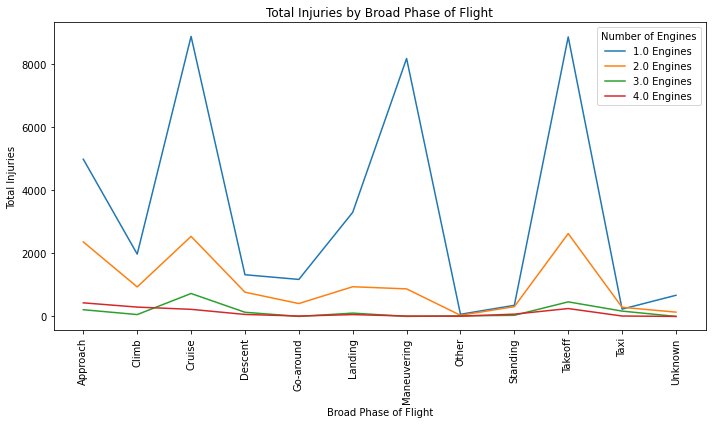

In [22]:
plt.figure(figsize=(10, 6))

engines = df_injured.index.get_level_values('Number.of.Engines').unique()

# Plotted total injuries by broad phase of flight
for engine in engines:
    df_engine = df_injured.xs(engine, level='Number.of.Engines')
    plt.plot(df_engine.index.get_level_values('Broad.phase.of.flight'), df_engine['Total.Injuries'], label=f'{engine} Engines')

# Customized the plot
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Total Injuries')
plt.title('Total Injuries by Broad Phase of Flight')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Number of Engines')

#Showed plot
plt.tight_layout()
plt.show()

### Weather Condition Analysis
* Grouped the data by weather condition and calculated injury ratios
* Visualized the injury ratios across Visual Meteorological Conditions (VMC) and Instrument Meteorological Conditions(IMC) or weather that requires pilots to fly mainly off of instrument navigation

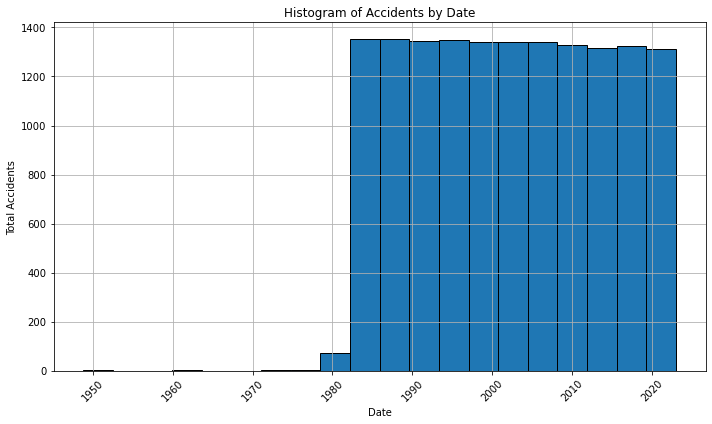

In [28]:
# Aggregated data by date to get total number of accidents on each date
df_timeline = df.groupby('Event.Date').size().reset_index(name='TotalAccidents')

# Converted the 'Event.Date' column to datetime format
df_timeline['Event.Date'] = pd.to_datetime(df_timeline['Event.Date'])

plt.figure(figsize=(10, 6))
plt.hist(df_timeline['Event.Date'], bins=20, edgecolor='black')


# Customized plot
plt.title('Histogram of Accidents by Date')
plt.xlabel('Date')
plt.ylabel('Total Accidents')
plt.xticks(rotation=45)
plt.grid(True)
# Showed plot
plt.tight_layout()
plt.show()

In [29]:
df.value_counts('Weather.Condition')

Weather.Condition
VMC    77303
IMC     5976
UNK      856
Unk      262
dtype: int64

In [30]:
#created new database organized by weather condition
weather_df = df.groupby('Weather.Condition').sum()
weather_df

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Weather.Condition,,,,,
IMC,7876.0,11824.0,2148.0,2732.0,39684.0
UNK,802.0,2407.0,189.0,593.0,10301.0
Unk,268.0,326.0,131.0,85.0,7041.0
VMC,83587.0,25558.0,17448.0,22973.0,303449.0


In [31]:
#calculated injury ratio to compare injuries by weather condition
weather_df['Total.Passengers'] = weather_df['Total.Fatal.Injuries'] + weather_df['Total.Serious.Injuries'] + weather_df['Total.Minor.Injuries'] + weather_df['Total.Uninjured']
weather_df['Total.Injuries'] = weather_df['Total.Fatal.Injuries'] + weather_df['Total.Serious.Injuries']
weather_df['Injury.Ratio'] = weather_df['Total.Injuries'] / weather_df['Total.Passengers']
weather_df

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Passengers,Total.Injuries,Injury.Ratio
Weather.Condition,,,,,,,,
IMC,7876.0,11824.0,2148.0,2732.0,39684.0,56388.0,13972.0,0.247783
UNK,802.0,2407.0,189.0,593.0,10301.0,13490.0,2596.0,0.192439
Unk,268.0,326.0,131.0,85.0,7041.0,7583.0,457.0,0.060266
VMC,83587.0,25558.0,17448.0,22973.0,303449.0,369428.0,43006.0,0.116412


In [32]:
#dropped UNK and Unk as they are small enough quantity compared to IMC and VMC. 
weather_subset_df = weather_df['Injury.Ratio']
weather_subset_df = weather_subset_df.drop(['UNK','Unk'])

In [58]:
weather_subset_df

Weather.Condition
IMC    0.247783
VMC    0.116412
Name: Injury.Ratio, dtype: float64

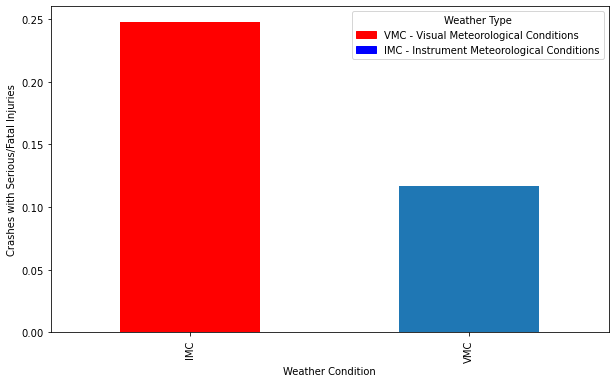

In [65]:
plt.figure(figsize=(10, 6))
ax = weather_subset_df.plot(kind='bar')

# Set the facecolor for each bar individually
ax.patches[0].set_facecolor('red')

# Set the labels and title
plt.xlabel('Weather Condition')
plt.ylabel('Crashes with Serious/Fatal Injuries')

# Created handles for each weather condition
handles = [plt.Rectangle((0,0),1,1, color='red'),
           plt.Rectangle((0,0),1,1, color='blue')]

# Added both weather conditions to the legend
ax.legend(handles, ['VMC - Visual Meteorological Conditions', 'IMC - Instrument Meteorological Conditions'], title='Weather Type')

# Show the plot
plt.show()

In [34]:
#Found difference between injury ratio 
injury_ratio_dif = weather_subset_df['IMC'] - weather_subset_df['VMC']
injury_ratio_dif

0.13137081657733163

In [73]:
event_date_df = df.groupby('Event.Date').sum()

In [69]:
#Dropped irrelevant columns
event_date_df = event_date_df.drop(columns=['Number.of.Engines'])

In [72]:
#Dropping first 3 rows as they are outliers
event_date_df = event_date_df[3:]
event_date_df

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Event.Date,,,,
1977-06-19,2.0,0.0,0.0,0.0
1979-08-02,1.0,2.0,0.0,0.0
1979-09-17,0.0,0.0,1.0,44.0
1981-08-01,4.0,0.0,0.0,0.0
1982-01-01,0.0,0.0,3.0,6.0
...,...,...,...,...
2022-12-18,0.0,0.0,0.0,3.0
2022-12-21,0.0,2.0,0.0,1.0
2022-12-22,1.0,0.0,0.0,0.0


# <ins>Recommendations and Conclusions<ins>
## Engine Configuration
    |* Recommend buying planes with multiple engines
    * Highlighted three or more engines has lowest fatality rate
## Phase of Flight Analysis
    * Injury distribution across different phases of flight show increased fatal injuries during Manuevering, Takeoff, and Cruise phases 
    * Increased adherence to safety protocals and trainings suggested
## Weather Condition
    * Pilots and aviation authorities should exercise caution and consider weather forecasts when planning flights, particularly in adverse conditions.
    * Weather conditions that require pilots to fly primarily by reference to instruments result in an increase of 13% of serious accidents in case of a crash
## Continuous Improvement
    * Total crashes has only marginally improved since the 80's
    * Aviation safety is an ongoing process that requires continuous monitoring, analysis, and improvement. 
    * By leveraging data-driven insights from past incidents, the head of the aviation division can reduce risks involved with purchasing different types of airplanes